In [37]:
#Read CSV
import csv


##csv_handler = csv.reader("Iberdrola oscillations/Elspec CSV data/During Event 1_COMP_275kV TransT1_f282_23_06_22_02_15_40_Waveform parameters.csv")

file = open("Iberdrola oscillations/Elspec CSV data/During Event 2_COMP_275kV TransT2_00e0_23_06_22_06_03_24_Waveform parameters.csv")

csvreader = csv.reader(file)

header = []


#header.append(next(csvreader))

#header.append(next(csvreader))

#header[0][0]

for x in csvreader:
    header.append(x)

len(header)



261058

In [17]:
header[1] 
datetimetext_csv = header[0][0]
voltage_va_name = header[0][1]
voltage_vb_name = header[0][2]
voltage_vc_name = header[0][3]
current_va_name = header[0][5]
current_vb_name = header[0][6]
current_vc_name = header[0][7]

df = {
    datetimetext_csv: 
}

['23/06/2022 02:15:39:949987AM',
 '-208513.2',
 '22703.95',
 '186746.3',
 '-164.3485',
 '2.347749',
 '-1.242826',
 '0.9666802',
 '3.452333']

In [4]:
import pandas as pd

df = pd.read_csv("Iberdrola oscillations/Elspec CSV data/During Event 2_COMP_275kV TransT2_00e0_23_06_22_06_03_24_Waveform parameters.csv")

In [56]:
df['Waveform Phase V1N']
df['Waveform Phase V2N']
df['Waveform Phase V3N']
df['Waveform Phase I1']
df['Waveform Phase I2']
df['Waveform Phase I3']



0        -1.016541
1        -0.664984
2        -0.307259
3         0.055655
4         0.422476
            ...   
261052    3.038282
261053    3.038282
261054    3.038282
261055    3.038282
261056    3.038282
Name: Waveform Phase I2, Length: 261057, dtype: float64

In [8]:
## csv to comtrade generator version 2
## Here we down sample from 50000Hz to about 7143Hz

import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.fft import fft, fftfreq
from comtradeConfig import ComtradeConfig
    
    
def generate_data_cfg():
    

    multiplier_voltage = max(df['Waveform Phase V1N'])/10000
    multiplier_current = max(df['Waveform Phase I1'])/1000

    ## construct the data for config file
    comtrade_cfg_data = []

    comtrade_cfg_data.append(",," + "2022")
    comtrade_cfg_data.append("6,6A,0D")
    comtrade_cfg_data.append("1,v1,a,,V," + str(multiplier_voltage) + ",0,0,-32767,32767,1,1,p")
    comtrade_cfg_data.append("2,v2,b,,V," + str(multiplier_voltage) + ",0,0,-32767,32767,1,1,p")
    comtrade_cfg_data.append("3,v3,c,,V," + str(multiplier_voltage) + ",0,0,-32767,32767,1,1,p")
    comtrade_cfg_data.append("4,iq,a,,A," + str(multiplier_current) + ",0,0,-32767,32767,1,1,p")
    comtrade_cfg_data.append("5,iq,b,,A," + str(multiplier_current) + ",0,0,-32767,32767,1,1,p")
    comtrade_cfg_data.append("6,iq,c,,A," + str(multiplier_current) + ",0,0,-32767,32767,1,1,p")
    comtrade_cfg_data.append(str(50))
    comtrade_cfg_data.append("1")
    comtrade_cfg_data.append(str(7142) + "," + str(len(df['Waveform Phase V1N'][0::7])))
    comtrade_cfg_data.append("23/06/2022,13:29:59.998918")
    comtrade_cfg_data.append("23/06/2022,13:35:00.017571")
    comtrade_cfg_data.append("ASCII")
    comtrade_cfg_data.append("1")
    
    return comtrade_cfg_data

def write_cfg_to_file():
    comtrade_cfg_data = generate_data_cfg()
    f_cfg = open("Comtrade_from_csv_downsampled.cfg","w")
    for cfg_line in comtrade_cfg_data:
        f_cfg.write(cfg_line + "\n")

    f_cfg.close()


## define the signal peaks

write_cfg_to_file()

def extract_data_into_array(dataframe):
    data_array = []
    for i in dataframe:
        data_array.append(i)
    return data_array
    



## function to compute and append data to dat file
def write_dat_to_file():
    f_dat = open("Comtrade_from_csv_downsampled.dat","w")
    
    multiplier_voltage = max(df['Waveform Phase V1N'])/10000
    multiplier_current = max(df['Waveform Phase I1'])/1000

    #### extract voltages and currents and store them in separate variables

    voltage_v1 = extract_data_into_array(df['Waveform Phase V1N'])
    voltage_v2 = extract_data_into_array(df['Waveform Phase V2N'])
    voltage_v3 = extract_data_into_array(df['Waveform Phase V3N'])

    current_i1 = extract_data_into_array(df['Waveform Phase I1'])
    current_i2 = extract_data_into_array(df['Waveform Phase I2'])
    current_i3 = extract_data_into_array(df['Waveform Phase I3'])

    timestamp = extract_data_into_array(df['timestamp'])

    ## Down sample voltages and currents

    voltage_v1 = voltage_v1[::7]
    voltage_v2 = voltage_v2[::7]
    voltage_v3 = voltage_v3[::7]

    current_i1 = current_i1[::7]
    current_i2 = current_i2[::7]
    current_i3 = current_i3[::7]

    timestamp = timestamp[::7]

    mega = 1000000

    for i in np.arange(0,len(voltage_v1),1):

        ##print(index,df['Waveform Phase V1N'][index],df['timestamp'][index])
        f_dat.write(str(i) + 
                    "," + str(timestamp[i]*mega) + 
                    "," + str(round(voltage_v1[i]/multiplier_voltage)) + 
                    "," + str(round(voltage_v2[i]/multiplier_voltage)) + 
                    "," + str(round(voltage_v3[i]/multiplier_voltage)) + 
                    "," + str(round(current_i1[i]/multiplier_current)) +
                    "," + str(round(current_i2[i]/multiplier_current)) + 
                    "," + str(round(current_i3[i]/multiplier_current)) + "\n")
        
    f_dat.close()
    
write_dat_to_file()

In [1]:
from comtradeConfig import ComtradeConfig

import pandas as pd

df = pd.read_csv("Iberdrola oscillations/Elspec CSV data/During Event 2_COMP_275kV TransT2_00e0_23_06_22_06_03_24_Waveform parameters.csv")

config = ComtradeConfig()
voltage = config.extract_data_into_array(df['Waveform Phase V1N'])

In [1]:
from comtradeConfig import ComtradeConfig

ComtradeConfig.sampling_rate()

4000

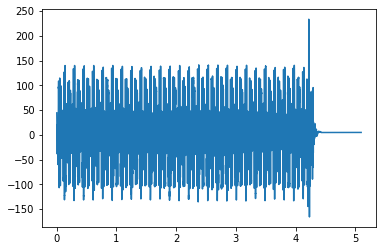

In [28]:
plt.plot(df_2['timestamp'],df_2['Waveform Phase I1'])

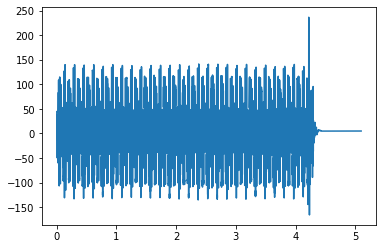

In [29]:
plt.plot(df['timestamp'],df['Waveform Phase I1'])

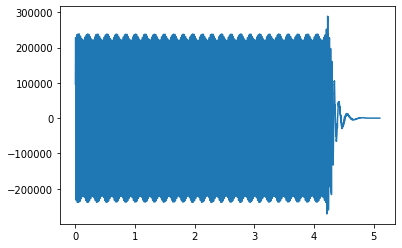

In [30]:
plt.plot(df_2['timestamp'],df_2['Waveform Phase V1N'])

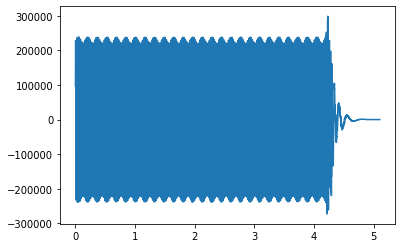

In [31]:
plt.plot(df['timestamp'],df['Waveform Phase V1N'])

In [20]:
df_3 = df.iloc[::7]

In [27]:
df_3

,Date,h,m,s,us,s.1,timestamp,Waveform Phase V1N,Waveform Phase V2N,Waveform Phase V3N,Waveform Phase I1,Waveform Phase I2,Waveform Phase I3,Unnamed: 13,Waveform Phase IN,Waveform Phase VN
0,23/06/2022,6,3,23,949993AM,23.949993,0.000000,96405.55,-226967.20000,130206.4000,44.435770,-1.016541,-38.211380,NaN,-2.527464,-147.45170
7,23/06/2022,6,3,23,950130AM,23.950130,0.000137,104929.10,-228100.50000,122496.5000,42.036100,1.529577,-38.341630,NaN,-2.478167,-619.00750
14,23/06/2022,6,3,23,950267AM,23.950267,0.000274,113247.60,-228794.70000,114553.5000,40.662630,3.878748,-38.363170,NaN,-2.431176,-119.46970
21,23/06/2022,6,3,23,950403AM,23.950403,0.000410,121364.10,-229018.60000,106362.1000,39.536590,5.401902,-38.459170,NaN,-2.386579,1368.57000
28,23/06/2022,6,3,23,950540AM,23.950540,0.000547,129266.30,-228765.60000,97938.9500,37.484100,6.124660,-38.709470,NaN,-2.344457,-1231.85200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261023,23/06/2022,6,3,29,049349AM,29.049349,5.099356,0.00,54.73823,-273.9588,4.971643,3.038282,-0.414051,NaN,-3.728816,1087.12200
261030,23/06/2022,6,3,29,049486AM,29.049486,5.099493,0.00,54.73823,-273.9588,4.971643,3.038282,-0.414051,NaN,-3.728816,-817.71210
261037,23/06/2022,6,3,29,049623AM,29.049623,5.099630,0.00,54.73823,-273.9588,4.971643,3.038282,-0.414051,NaN,-3.728816,-30.58445
261044,23/06/2022,6,3,29,049759AM,29.049759,5.099766,0.00,54.73823,-273.9588,4.971643,3.038282,-0.414051,NaN,-3.728816,91.68871


In [9]:
df_2['Waveform Phase V1N'][0:10]
len(df)

261057

In [ ]:
### A test to check that I can call a static method within another static method in the Utilities class
